<!-- This section contains the code for R, G, B seperation -->

In [1]:
import matplotlib.pyplot as mtpplt
from improc.utils import split_img_channels
import numpy as np

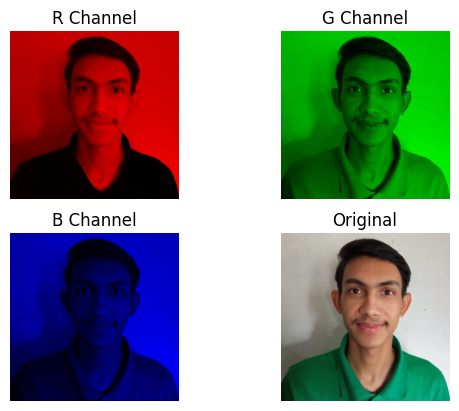

In [2]:
img_path = "../assets/images/rt.jpg"
channel_list = split_img_channels(img_path)
channel_title = ["R", "G", "B"]

mtpplt.figure()
for i in range(len(channel_list)):
    mtpplt.subplot(2, 2, i + 1)
    mtpplt.imshow(channel_list[i])
    mtpplt.axis('off')
    mtpplt.title(channel_title[i] + " Channel")

mtpplt.subplot(2, 2, len(channel_list) + 1)
mtpplt.imshow(mtpplt.imread(img_path))
mtpplt.axis('off')
mtpplt.title("Original")

# saving to output dir
save_path = "../assets/output/RGB-Seperate.png"
mtpplt.savefig(save_path)

mtpplt.show()

<!-- This section contains the code for RGB to Gray Scale -->

<!-- This section contains the RGB to Grayscale -->

In [3]:
import numpy as np
from improc.utils import pixel_iterator
import matplotlib.pyplot as mtpplt

In [4]:
average = lambda pixel: sum(pixel) / len(pixel)
weighted_avg = lambda pixel, weights: average([pixel[i] * weights[i] for i in range(len(pixel))])

In [5]:
def simple_average(pixel) -> np.ndarray:
    return average(pixel)

ntsc_weight = [0.299, 0.587, 0.114]
def ntsc_average(pixel) -> np.ndarray:
    return weighted_avg(pixel, ntsc_weight)

lum_weight = [0.2126, 0.7152, 0.0722]
def lum_average(pixel) -> np.ndarray:
    return weighted_avg(pixel, lum_weight)

In [6]:
img_path = "../assets/images/rt.jpg"
img = np.array(mtpplt.imread(img_path))

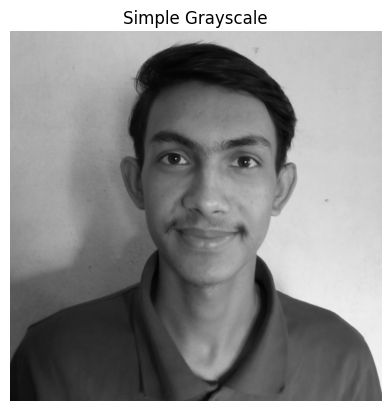

In [7]:
# simple average
simple_result = img.copy()
pixel_iterator(img, simple_average, simple_result)
mtpplt.title("Simple Grayscale")
mtpplt.axis('off')
mtpplt.imshow(simple_result)
mtpplt.show()

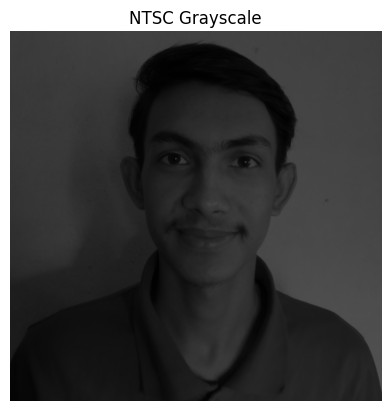

In [8]:
# ntsc weighted average
ntsc_result = img.copy()
pixel_iterator(img, ntsc_average, ntsc_result)
mtpplt.title("NTSC Grayscale")
mtpplt.axis('off')
mtpplt.imshow(ntsc_result)
mtpplt.show()

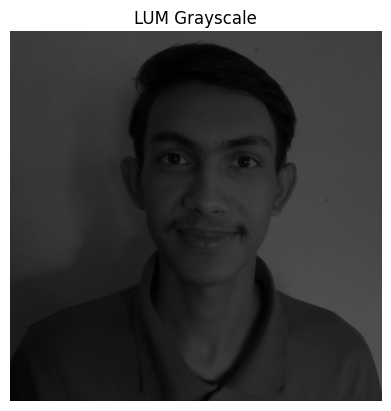

In [9]:
# luminosity method weighted average
lum_result = img.copy()
pixel_iterator(img, lum_average, lum_result)
mtpplt.title("LUM Grayscale")
mtpplt.axis('off')
mtpplt.imshow(lum_result)
mtpplt.show()

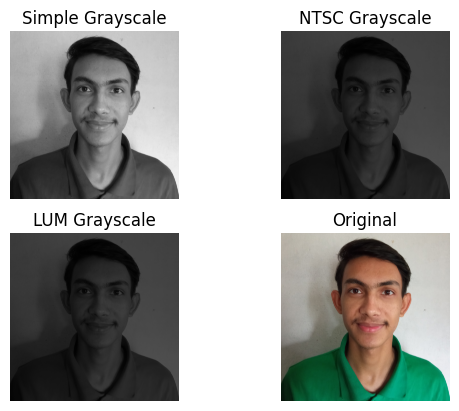

In [10]:
mtpplt.figure()
result_list = [simple_result, ntsc_result, lum_result]
result_title = ["Simple", "NTSC", "LUM"]

for i in range(len(result_list)):
    mtpplt.subplot(2, 2, i + 1)
    mtpplt.imshow(result_list[i])
    mtpplt.axis('off')
    mtpplt.title(result_title[i] + " Grayscale")

mtpplt.subplot(2, 2, len(result_list) + 1)
mtpplt.imshow(img)
mtpplt.axis('off')
mtpplt.title("Original")

# to save in output dir
save_path = "../assets/output/RGB-Grayscale.png"
mtpplt.savefig(save_path)

mtpplt.show()

In [11]:
import matplotlib.pyplot as mpl
import numpy as np

img_path = "../assets/images/rt.jpg"
img = mpl.imread(img_path)
img

array([[[187, 181, 169],
        [187, 181, 169],
        [187, 181, 169],
        ...,
        [194, 191, 182],
        [194, 191, 182],
        [193, 190, 181]],

       [[187, 181, 169],
        [187, 181, 169],
        [187, 181, 169],
        ...,
        [194, 191, 182],
        [193, 190, 181],
        [193, 190, 181]],

       [[186, 180, 168],
        [186, 180, 168],
        [186, 180, 168],
        ...,
        [193, 190, 181],
        [193, 190, 181],
        [193, 190, 181]],

       ...,

       [[  8,  19,  11],
        [  7,  18,  10],
        [  7,  18,  10],
        ...,
        [  5, 161, 122],
        [  5, 161, 122],
        [  5, 161, 122]],

       [[  8,  19,  11],
        [  7,  18,  10],
        [  7,  18,  10],
        ...,
        [  5, 161, 122],
        [  5, 161, 122],
        [  5, 161, 122]],

       [[  7,  18,  10],
        [  8,  19,  11],
        [  8,  19,  11],
        ...,
        [  4, 160, 121],
        [  4, 160, 121],
        [  4, 160, 121]]

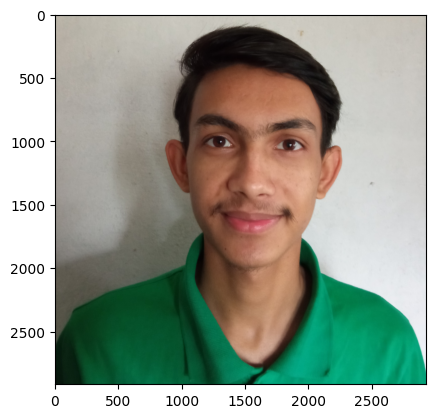

In [12]:
mpl.imshow(img)

### Salt and Pepper Noise

In [31]:
s_vs_p = 0.5
amount = 0.1

def add_sp_noise(img : np.ndarray) -> np.ndarray:
    result = np.copy(img)
    W, H = img.shape

    # adding salt on the random sampled (x, y) coord
    num_salt = int(np.ceil(amount * img.size * s_vs_p))
    
    XY = []

    for i in range(num_salt):
        x = np.random.randint(0, W)
        y = np.random.randint(0, H)
        XY.append([x,y])
        result[x][y] = 255

    # adding pepper on the random sampled (x, y) coord
    num_pepper = int(np.ceil(amount * img.size * (1 - s_vs_p)))
    
    for i in range(num_pepper):
        x = np.random.randint(0, W)
        y = np.random.randint(0, H)
        XY.append([x,y])
        result[x][y] = 0

    print(num_salt, num_pepper, img.size)

    # with open("random_xy.txt", "w") as nf:
    #     nf.write(str(XY))

    return result

In [37]:
img2 = mpl.imread("../assets/images/sameer.jpg")
img2 = np.dot(img2[...,:3], [0.2989, 0.5870, 0.1140])
noisy_img = add_sp_noise(img2)

65345 65345 1306887


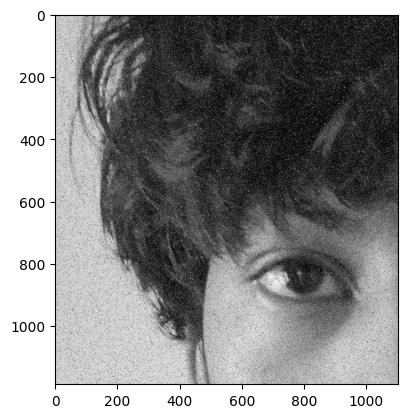

In [38]:
mpl.imshow(noisy_img, cmap="gray")

### Gaussian Noise

In [39]:
mean = 0
var = 125
sigma = var ** 0.5

def gaussian_noise(img: np.ndarray) -> np.ndarray:
    result = np.copy(img)

    W, H = img.shape

    gauss = np.random.normal(mean, sigma, (W, H))
    gauss = gauss.astype(int)
    # gauss += 127
    print(gauss)
    result = img + gauss

    return result

In [40]:
gauss_noisy = gaussian_noise(img2)

[[ -4  13 -21 ... -27   3  -5]
 [  0 -15 -10 ...   0  -8   0]
 [ -9 -14 -11 ... -29   6  15]
 ...
 [ -3   0   4 ...  -6  -3  -6]
 [ -3 -17  -6 ...  -5  23  13]
 [ 15  12  -5 ...  15   3  11]]


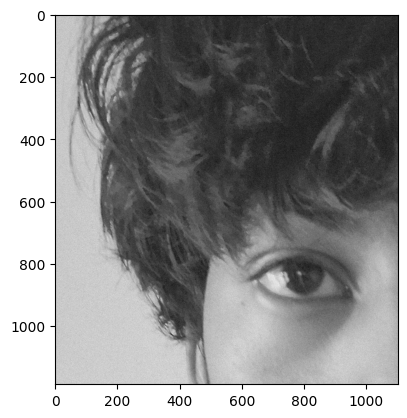

In [42]:
mpl.imshow(gauss_noisy, cmap="gray")

In [43]:
# vals = len

# def poisson_noise(img: np.ndarray) -> np.ndarray:
#     result = np.copy(img)



#     return result
# poisson

### Gaussian Smoothing

In [44]:
from improc.utils import *

In [46]:
gaussian_kernel = np.array([
    [1.0 / 16, 2.0 / 16, 1.0 / 16],
    [2.0 / 16, 4.0 / 16, 2.0 / 16],
    [1.0 / 16, 2.0 / 16, 1.0 / 16]
])
smooth_gauss = conv2d(noisy_img, gaussian_kernel)

In [47]:
smooth_gauss.shape, noisy_img.shape
# smooth_gauss[0:10][0:10]

((1187, 1101), (1187, 1101))

In [48]:
smooth_gauss

array([[114.1142625 , 154.813325  , 156.9326875 , ...,  18.13903125,
         16.38920625,  10.90141875],
       [153.1939125 , 210.330425  , 216.00650625, ...,  23.58126875,
         21.8939375 ,  14.95185   ],
       [153.13141875, 207.586125  , 211.08035   , ...,  21.37704375,
         18.92284375,  13.68503125],
       ...,
       [166.043275  , 215.50258125, 198.31520625, ..., 187.6816375 ,
        181.80575   , 135.29191875],
       [171.1596125 , 218.49820625, 188.49394375, ..., 191.4857    ,
        180.67133125, 134.1130125 ],
       [125.8427875 , 162.61019375, 151.351575  , ..., 140.8638125 ,
        134.92543125, 100.0535625 ]])

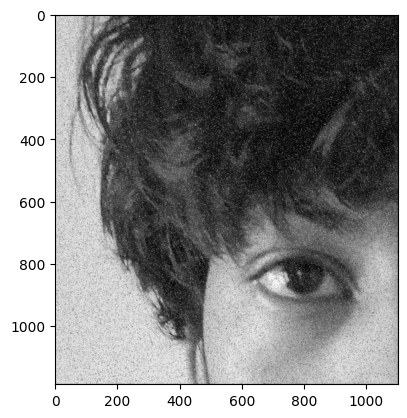

In [50]:
mpl.imshow(smooth_gauss, cmap="gray")
mpl.imsave("temp.png", smooth_gauss)

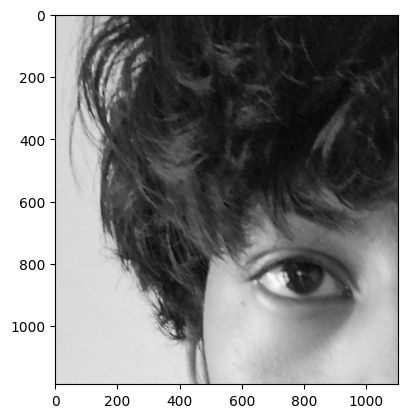

In [54]:
mpl.imshow(img2, cmap="gray")